In [1]:


# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import math
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping, LearningRateScheduler

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')



2023-12-19 14:34:20.046315: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 14:34:20.046453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 14:34:20.221025: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 14:34:20.721713: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-19 14:34:24.404074: W tensorflow/comp

modules loaded


In [36]:
import pandas as pd
train_csv = pd.read_csv('./Training_set.csv')
test_csv = pd.read_csv('./Testing_set.csv')


In [4]:


def shape_of_ds(df, ds_name='df'):
    print(f"{ds_name} dataset has {df.shape[0]} rows and {df.shape[1]} columns")
    
def check_null(df, ds_name='df'):
    print(f"Number of null values in the {ds_name} dataset: ")
    print(df.isnull().sum())

def unique_vals(df, ds_name='df'):
    print(f"Number of unique values in {ds_name} dataset: ")
    print(df.nunique())
    
def seperator(sep=50):
    print("-"*sep)






In [5]:
train_csv.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [6]:
test_csv.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [7]:
shape_of_ds(train_csv, "Train")
shape_of_ds(test_csv, "Test")

Train dataset has 6499 rows and 2 columns
Test dataset has 2786 rows and 1 columns


In [8]:
check_null(train_csv, 'Train')

Number of null values in the Train dataset: 
filename    0
label       0
dtype: int64


In [9]:
unique_vals(train_csv, 'Train')

Number of unique values in Train dataset: 
filename    6499
label         75
dtype: int64


In [10]:
unique_vals(test_csv, 'Test')

Number of unique values in Test dataset: 
filename    2786
dtype: int64


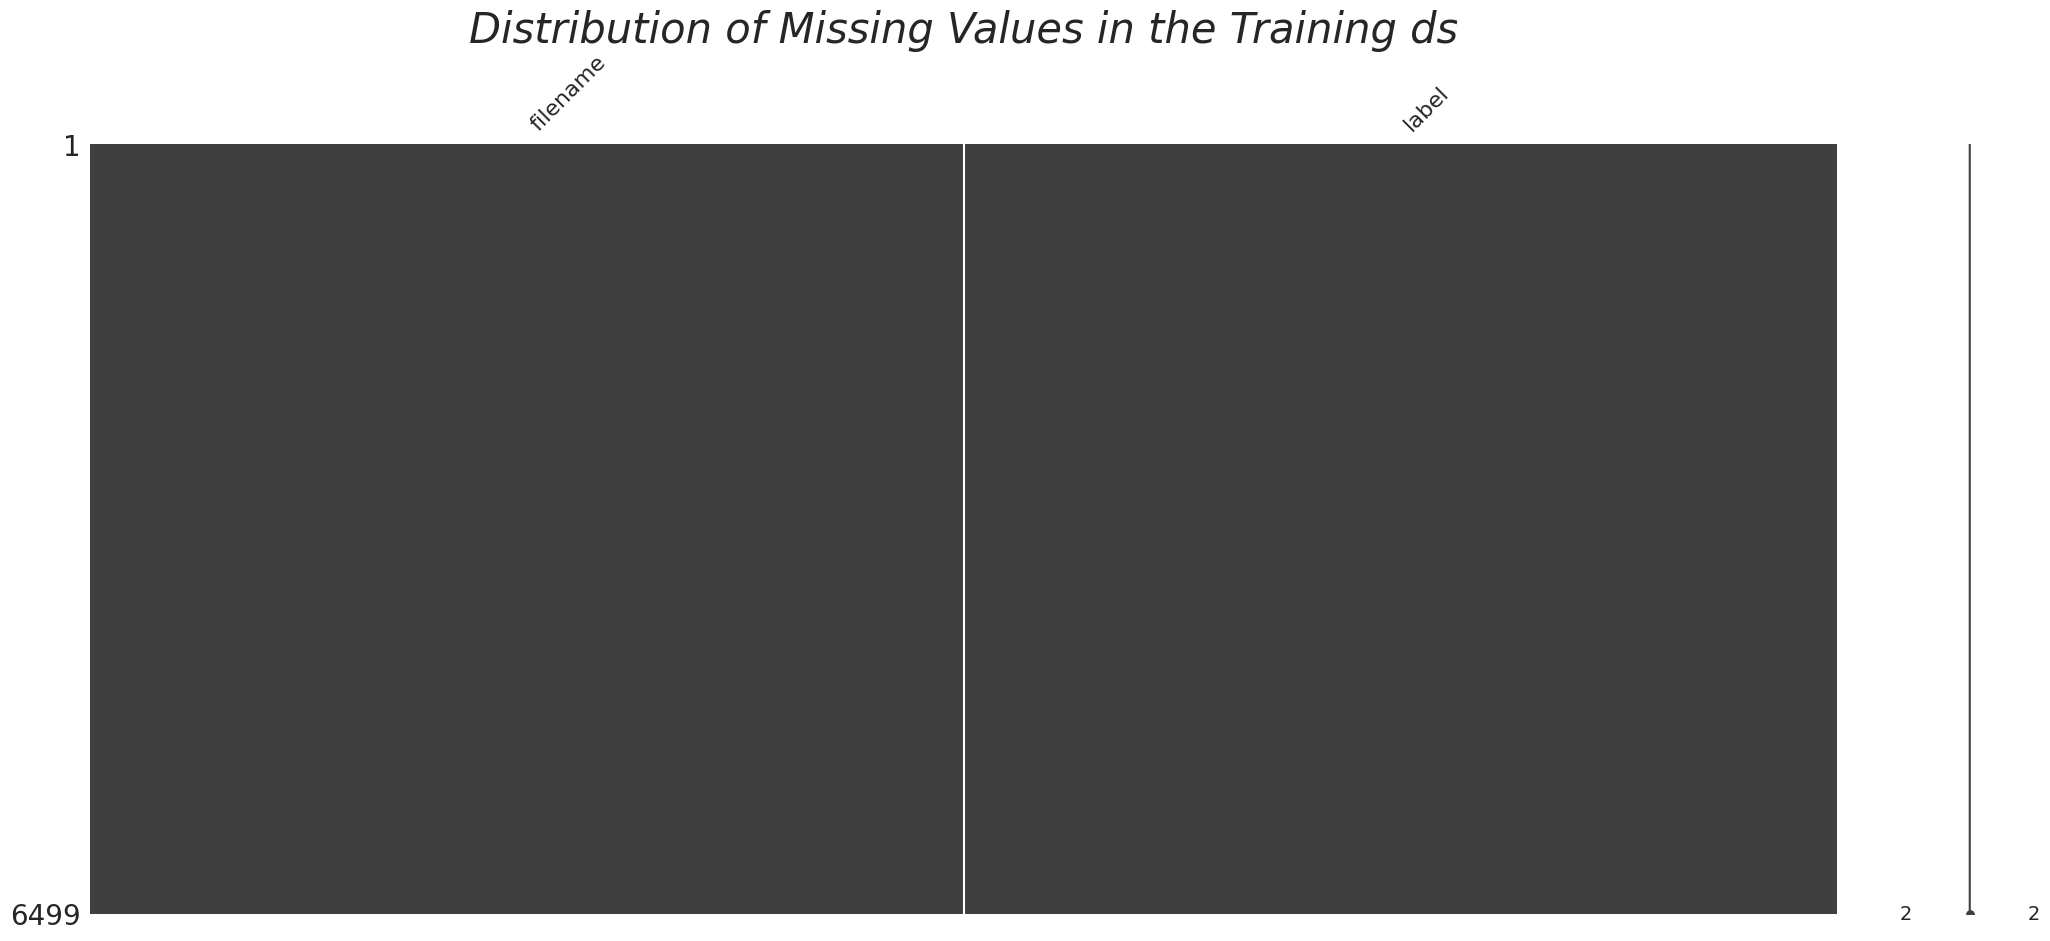

In [11]:
#visualize null values
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(train_csv)
plt.title('Distribution of Missing Values in the Training ds', fontsize=30, fontstyle='oblique');

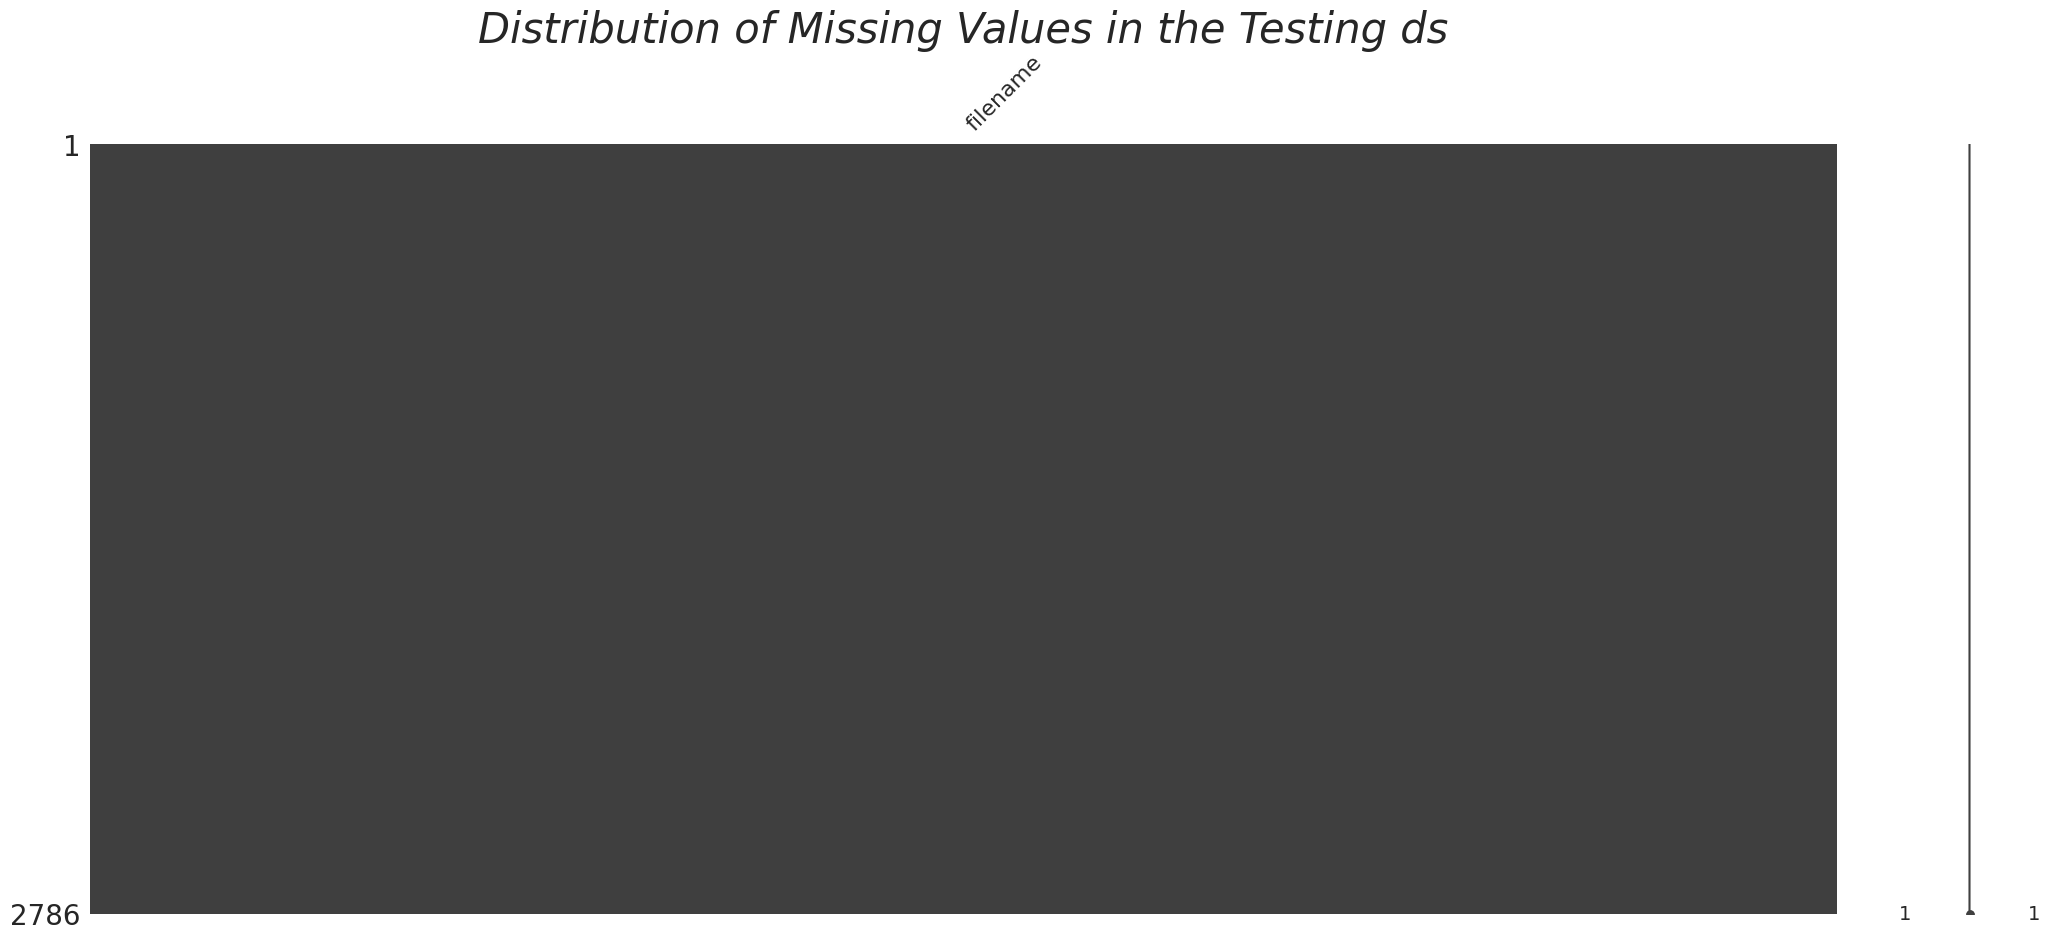

In [12]:
msno.matrix(test_csv)
plt.title('Distribution of Missing Values in the Testing ds', fontsize=30, fontstyle='oblique');

In [37]:
from sklearn.model_selection import train_test_split


train_csv['filename'] = './train/' + train_csv['filename']
test_csv['filename'] = './test/' + test_csv['filename']
print(train_csv.head())
print(test_csv.head())


              filename                     label
0  ./train/Image_1.jpg          SOUTHERN DOGFACE
1  ./train/Image_2.jpg                    ADONIS
2  ./train/Image_3.jpg            BROWN SIPROETA
3  ./train/Image_4.jpg                   MONARCH
4  ./train/Image_5.jpg  GREEN CELLED CATTLEHEART
             filename
0  ./test/Image_1.jpg
1  ./test/Image_2.jpg
2  ./test/Image_3.jpg
3  ./test/Image_4.jpg
4  ./test/Image_5.jpg


In [38]:
train_size = 0.75
train_df, valid_df = train_test_split(train_csv,  train_size= train_size, shuffle= True, random_state= 123)
print("Training set size:", train_df.shape)
print("Validation set size:", valid_df.shape)

Training set size: (4874, 2)
Validation set size: (1625, 2)


In [39]:
train_df.head()

,filename,label
5575,./train/Image_5576.jpg,COMMON WOOD-NYMPH
1302,./train/Image_1303.jpg,INDRA SWALLOW
3222,./train/Image_3223.jpg,TROPICAL LEAFWING
3374,./train/Image_3375.jpg,CHECQUERED SKIPPER
1094,./train/Image_1095.jpg,BLACK HAIRSTREAK


In [40]:
valid_df.head()

,filename,label
2482,./train/Image_2483.jpg,MOURNING CLOAK
5148,./train/Image_5149.jpg,EASTERN DAPPLE WHITE
941,./train/Image_942.jpg,GREEN CELLED CATTLEHEART
970,./train/Image_971.jpg,DANAID EGGFLY
4899,./train/Image_4900.jpg,EASTERN PINE ELFIN


In [41]:
def count_plot(x, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.show()

In [42]:
train_order = train_df['label'].value_counts()
train_order

label
MOURNING CLOAK               90
SCARCE SWALLOW               81
ORANGE TIP                   81
EASTERN PINE ELFIN           80
BROWN SIPROETA               76
                             ..
MALACHITE                    52
CRIMSON PATCH                52
WOOD SATYR                   51
AFRICAN GIANT SWALLOWTAIL    51
ELBOWED PIERROT              50
Name: count, Length: 75, dtype: int64

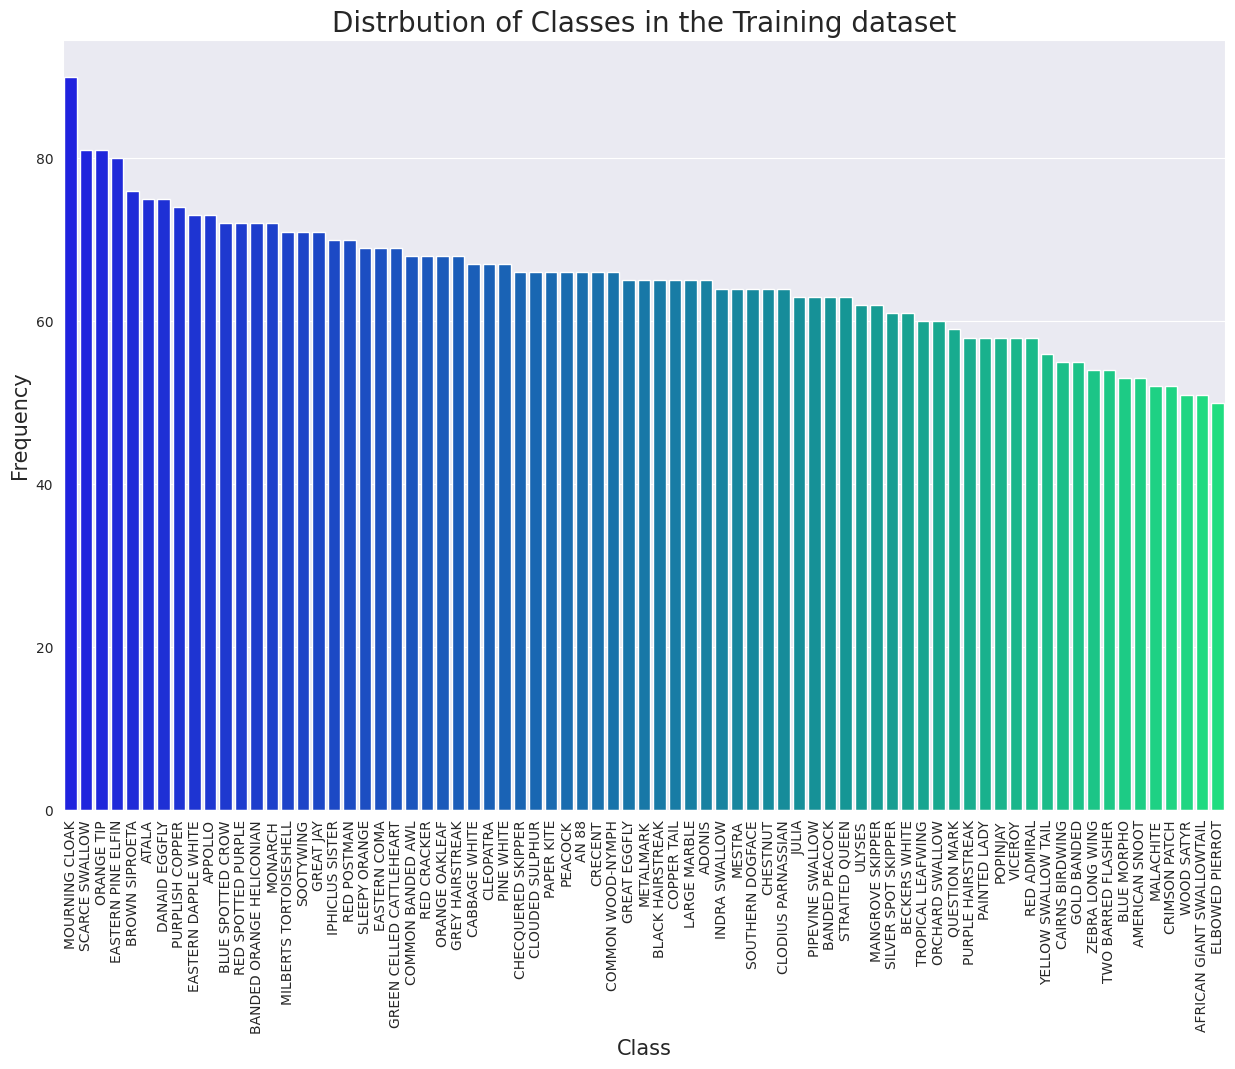

In [43]:
import seaborn as sns

x = train_df['label']
count_plot(x, train_df, "Distrbution of Classes in the Training dataset", 'Class', 'Frequency', 15,10, order = train_order.index, rotation=True)

In [20]:
valid_order = valid_df['label'].value_counts()
valid_order

label
MOURNING CLOAK        41
SLEEPY ORANGE         38
ELBOWED PIERROT       32
CRECENT               31
COPPER TAIL           29
                      ..
ORANGE TIP            15
RED SPOTTED PURPLE    14
BLUE SPOTTED CROW     14
GREAT EGGFLY          13
METALMARK             11
Name: count, Length: 75, dtype: int64

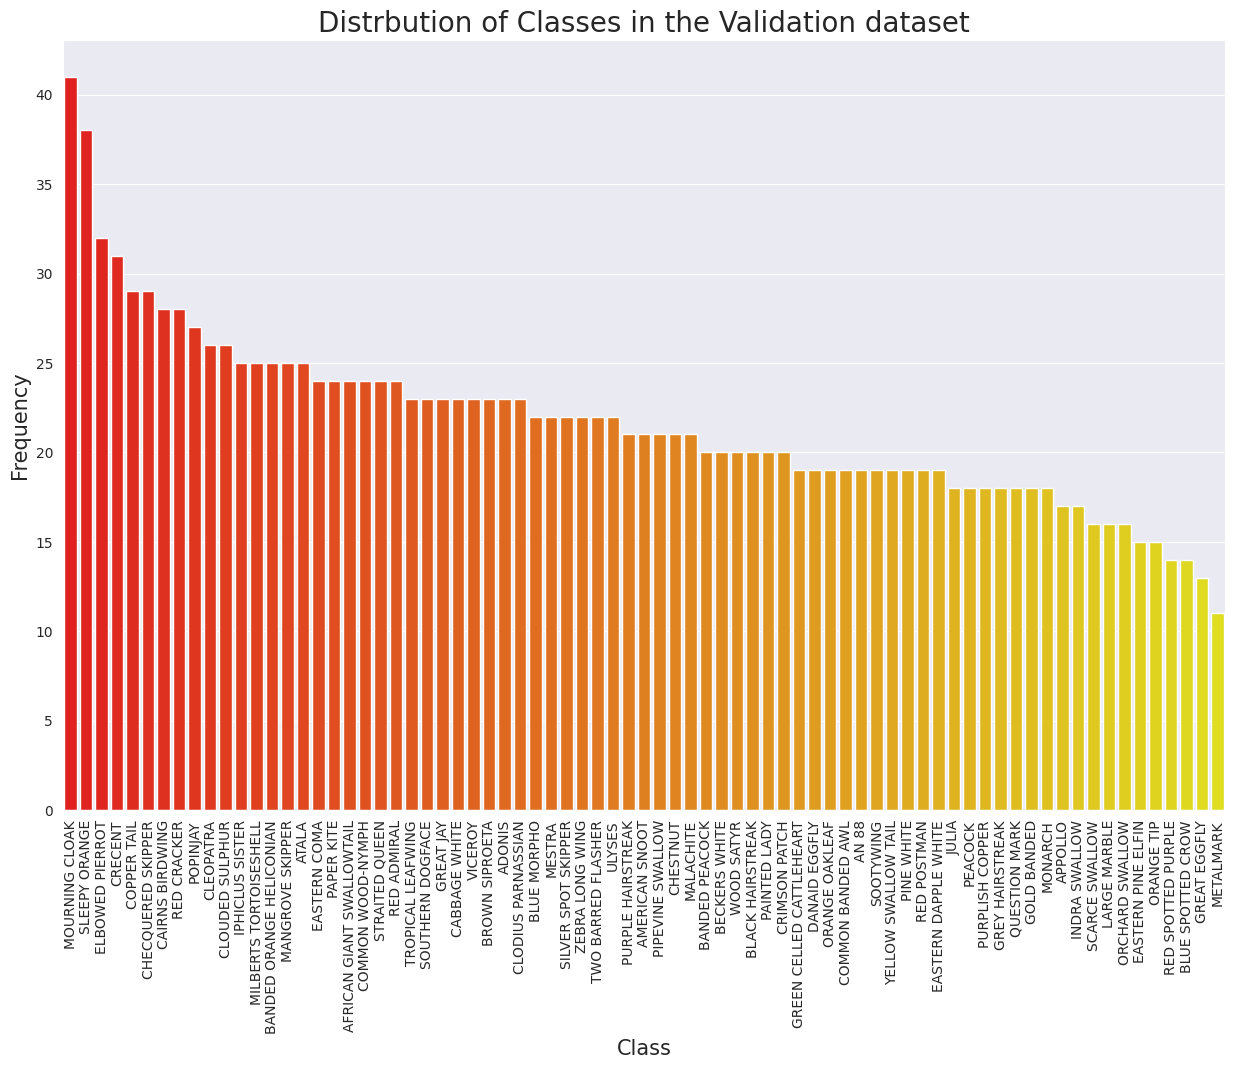

In [44]:


x = valid_df['label']
count_plot(x, valid_df, "Distrbution of Classes in the Validation dataset", 'Class', 'Frequency', 15,10, order = valid_order.index, rotation=True, palette='autumn')



    batch_size: This is set to 16. It typically represents the number of samples processed in one iteration during training.

    img_size: This is a tuple (224, 224) representing the desired size for your input images. Images are often resized to a standard size before being fed into a neural network.

    channels: This is set to 3, indicating that your images are assumed to have three color channels (RGB).

    img_shape: This is a tuple representing the shape of each image in your dataset. It is derived from img_size and channels. In this case, it's (224, 224, 3).

    ts_length: This variable holds the length of your test dataset (test_csv).

    test_batch_size: This variable is calculated dynamically based on the length of the test dataset. It finds the largest divisor of ts_length that is less than or equal to 80, and sets test_batch_size to that value.

    test_steps: This variable represents the number of steps it would take to process the entire test dataset with the calculated test_batch_size.

Let's break down the code for finding test_batch_size:

    for n in range(1, ts_length + 1) if ts_length % n == 0 and ts_length / n <= 80: This loop iterates over divisors of ts_length that are less than or equal to 80.

    sorted([ts_length // n for n in ...]): It creates a list of divisors, sorts them in ascending order, and takes the maximum.

This ensures that test_batch_size is a divisor of ts_length and is less than or equal to 80.

After printing the values of ts_length, test_batch_size, and test_steps, you should get insights into how the test data will be processed in batches during testing

In [45]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Recommended : use custom function for test data batch size, else we can use normal batch size.
ts_length = len(test_csv)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

print(ts_length)
print(test_batch_size)
print(test_steps)

2786
14
199


In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# This function which will be used in image data generator for data augmentation, it just take the image and return it again.
def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar,
                            rotation_range=40,
                            width_shift_range=0.3,
                            height_shift_range=0.2,
                            brightness_range=None,
                            shear_range=0.1,
                            zoom_range=0.3,
                            channel_shift_range=0.4)

ts_gen = ImageDataGenerator(preprocessing_function= scalar,
                            rotation_range=40,
                            width_shift_range=0.3,
                            height_shift_range=0.2,
                            brightness_range=None,
                            shear_range=0.1,
                            zoom_range=0.3,
                            channel_shift_range=0.4)

train_gen = tr_gen.flow_from_dataframe( train_df, 
                                        x_col= 'filename', 
                                        y_col= 'label', 
                                        target_size= img_size, 
                                        class_mode= 'categorical',
                                        color_mode= 'rgb', 
                                        shuffle= True, 
                                        batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, 
                                       x_col= 'filename', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= 'rgb', 
                                       shuffle= True, 
                                       batch_size= batch_size)

# Note: we will use custom test_batch_size, and make shuffle= false

'''
test_gen = ts_gen.flow_from_dataframe( test_csv, 
                                       x_col= 'filename',  
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= 'rgb', 
                                       shuffle= False, 
                                       batch_size= test_batch_size)
'''

Found 4874 validated image filenames belonging to 75 classes.
Found 1625 validated image filenames belonging to 75 classes.


"\ntest_gen = ts_gen.flow_from_dataframe( test_csv, \n                                       x_col= 'filename',  \n                                       target_size= img_size, \n                                       class_mode= 'categorical',\n                                       color_mode= 'rgb', \n                                       shuffle= False, \n                                       batch_size= test_batch_size)\n"

In [47]:
train_df['filename'][0]

'./train/Image_1.jpg'

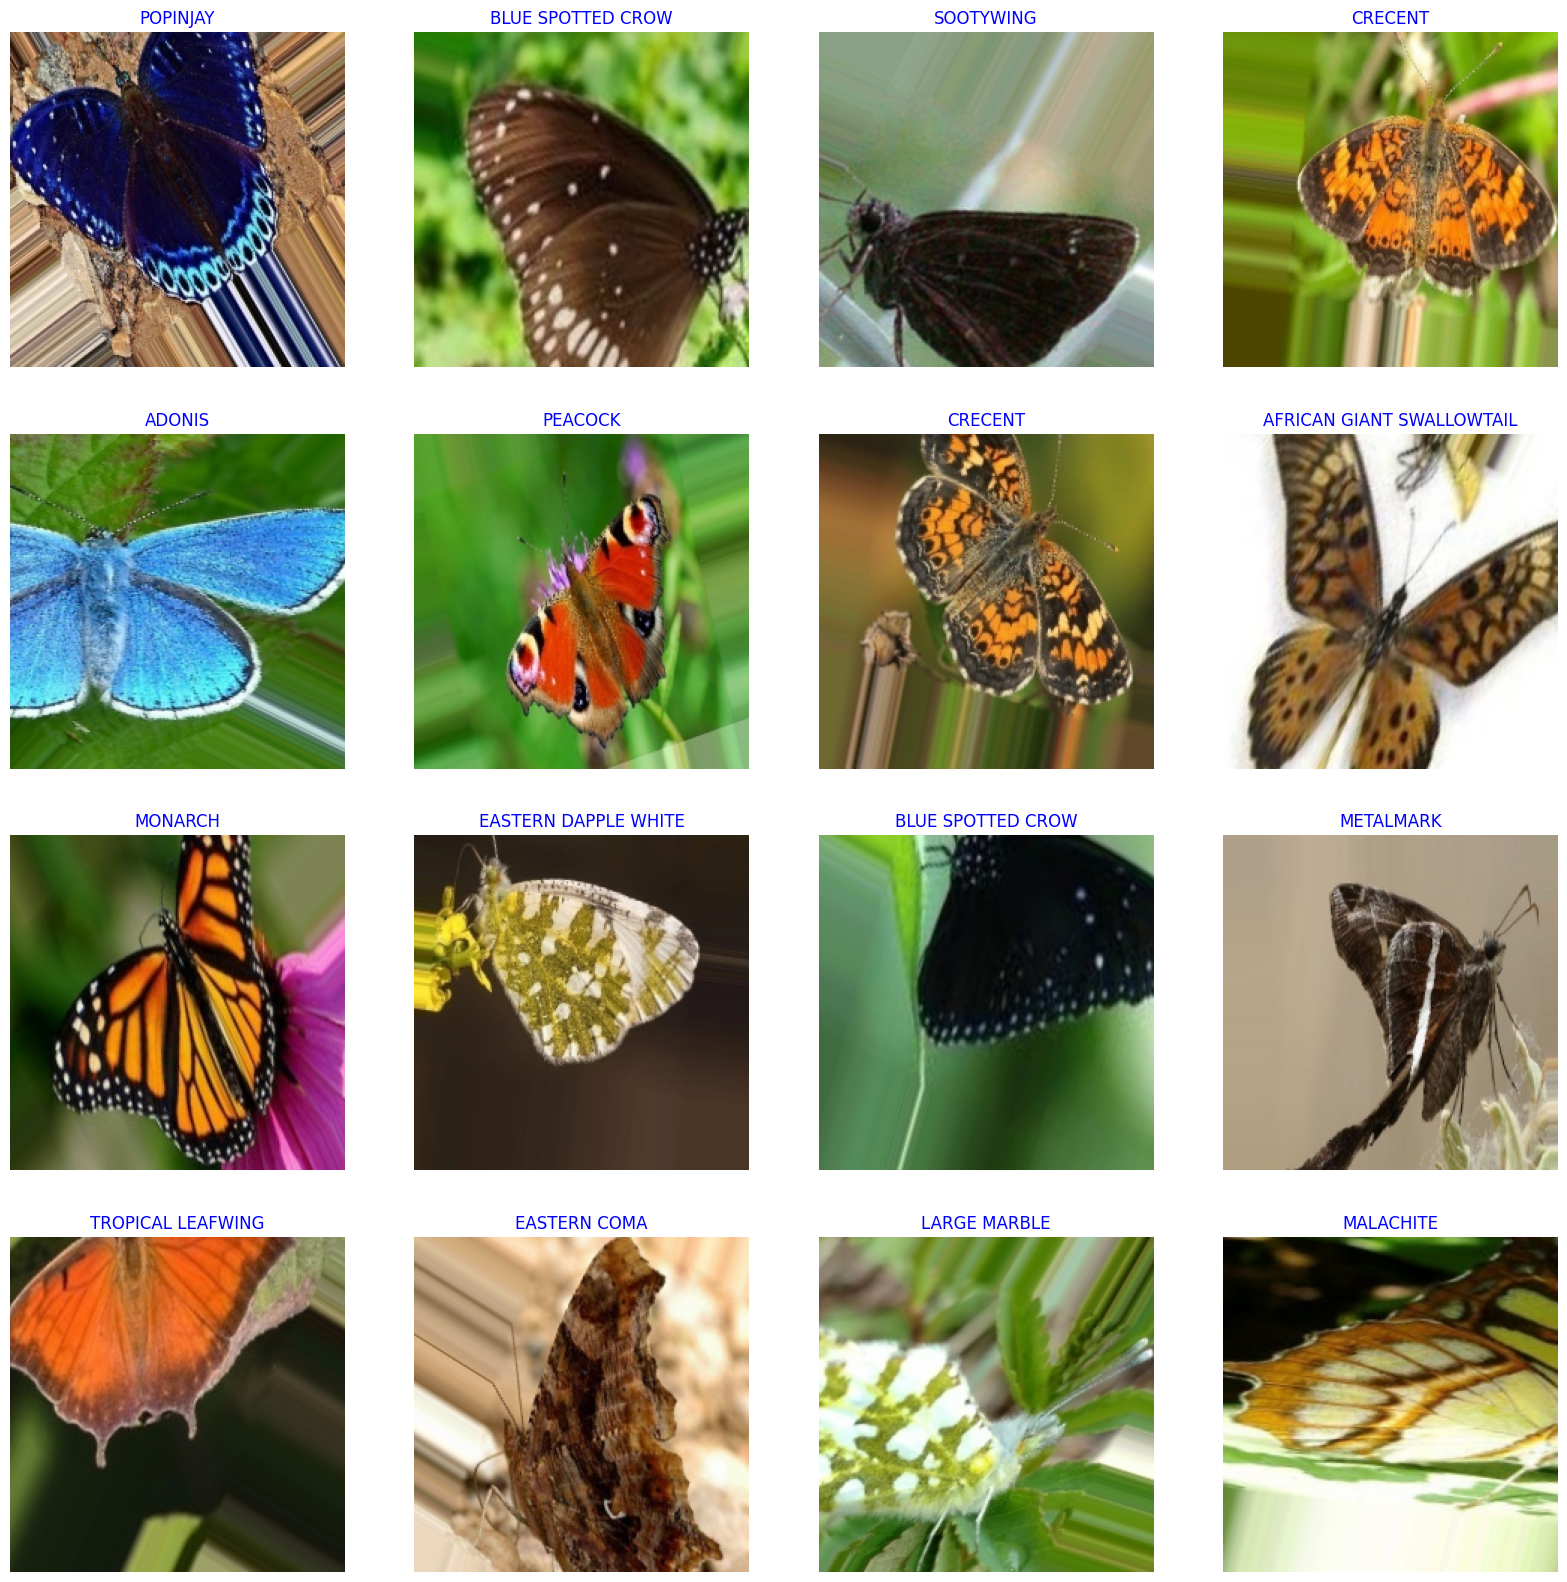

In [25]:


g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()



In [48]:
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential 
model4 = Sequential()
model4.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(224,224, 3))) 
model4.add(MaxPooling2D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(75, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      832       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 802816)            0         
                                                                 
 dense_1 (Dense)             (None, 75)                60211275  
                                                                 
Total params: 60212107 (229.69 MB)
Trainable params: 60212107 (229.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
history = model4.fit(train_gen, epochs=10, validation_data=valid_gen)

Epoch 1/10


2023-12-19 15:12:56.974454: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-19 15:13:04.648579: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-19 15:13:05.338951: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fac3401f800 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-19 15:13:05.339022: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
2023-12-19 15:13:05.585233: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-19 15:13:06.486702: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
I0000 00:00:1702995186.744368    4125 device_compiler.

305/305 [==============================] - 175s 501ms/step - loss: 1233.3069 - accuracy: 0.0386 - val_loss: 29.8576 - val_accuracy: 0.0529
Epoch 2/10
305/305 [==============================] - 121s 397ms/step - loss: 18.0937 - accuracy: 0.0562 - val_loss: 13.5781 - val_accuracy: 0.0486
Epoch 3/10
305/305 [==============================] - 121s 398ms/step - loss: 9.7830 - accuracy: 0.0527 - val_loss: 7.7537 - val_accuracy: 0.0634
Epoch 4/10
305/305 [==============================] - 122s 399ms/step - loss: 6.2780 - accuracy: 0.0568 - val_loss: 6.5285 - val_accuracy: 0.0566
Epoch 5/10
305/305 [==============================] - 122s 398ms/step - loss: 5.0261 - accuracy: 0.0646 - val_loss: 5.0936 - val_accuracy: 0.0751
Epoch 6/10
305/305 [==============================] - 122s 399ms/step - loss: 4.5036 - accuracy: 0.0755 - val_loss: 4.7092 - val_accuracy: 0.0671
Epoch 7/10
305/305 [==============================] - 121s 397ms/step - loss: 4.3503 - accuracy: 0.0749 - val_loss: 4.5938 - val_

In [28]:
# import tensorflow as tf
# tf.keras.backend.clear_session()


In [51]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB5(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
base_model.trainable = False

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(512, activation = 'relu'),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

115263384/115263384 [==============================] - 4s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional  (None, 2048)              28513527  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                     

In [52]:
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=5, 
                               restore_best_weights=True,
                               mode='max',
                              )

def step_decay(epoch):
    
     initial_lrate = 0.1
     drop = 0.5
     epochs_drop = 10.0
     lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
     return lrate

lr_scheduler = LearningRateScheduler(step_decay)

In [55]:
batch_size = 16   # set batch size for training
epochs = 1000   # number of all epochs in training

history = model.fit(x= train_gen, 
                    epochs= 2, 
                    verbose= 1, 
                    validation_data= valid_gen, 
                    validation_steps= None, 
                    shuffle= False,
                    batch_size = batch_size,
                    callbacks=[early_stopping])

Epoch 1/2
305/305 [==============================] - 124s 408ms/step - loss: 1.2564 - accuracy: 0.8420 - val_loss: 1.1780 - val_accuracy: 0.8560
Epoch 2/2
305/305 [==============================] - 124s 405ms/step - loss: 1.2350 - accuracy: 0.8383 - val_loss: 1.1633 - val_accuracy: 0.8431


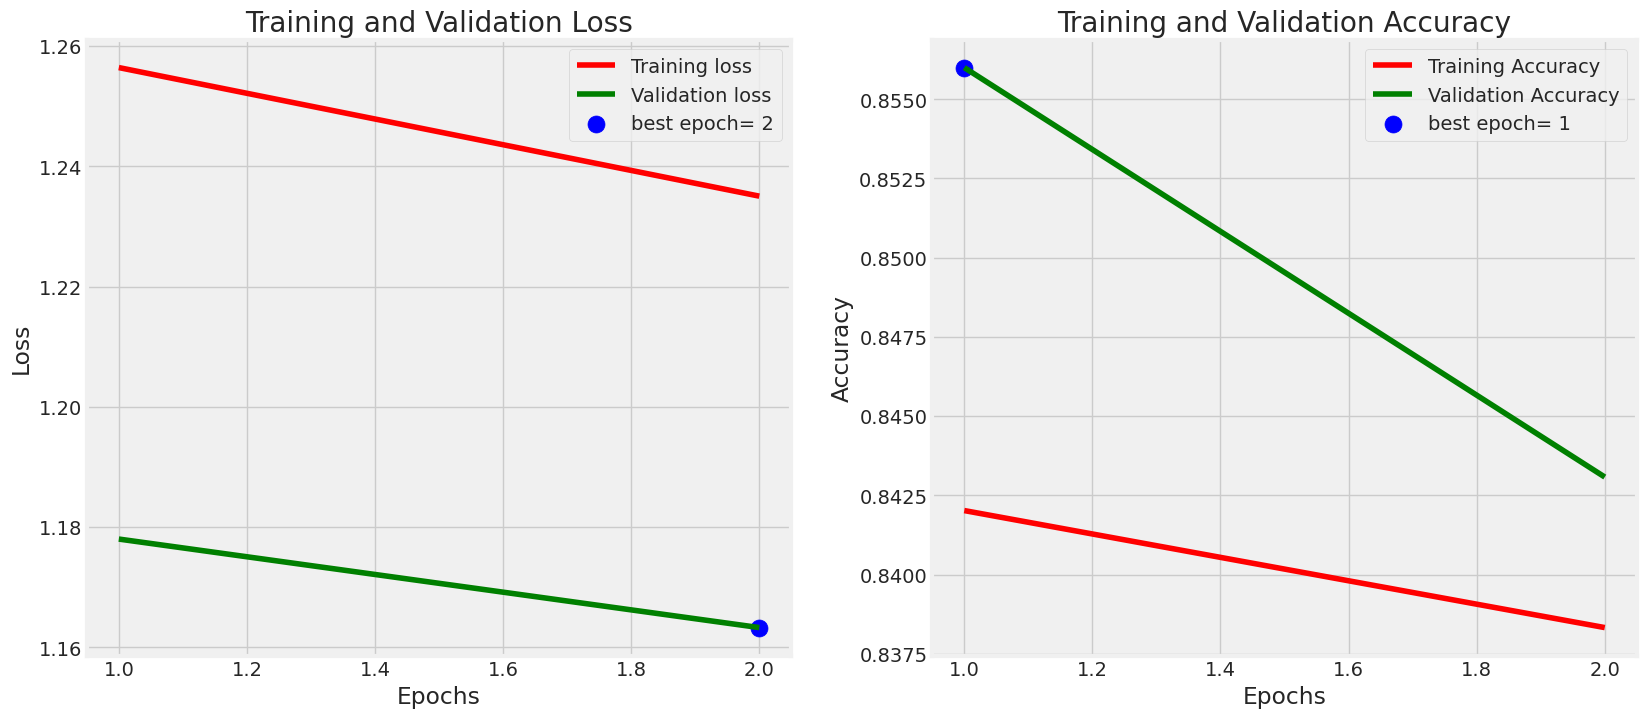

In [56]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()